In [423]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.height', 2000)
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 2000)
sns.set(font_scale = 1.5)

In [424]:
df = pd.read_csv('listings_cleaned.csv')

In [425]:
df.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_response_rate,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,street,neighbourhood,zipcode,accommodates,bathrooms,bedrooms,beds,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,review_score_totals,recent_availability,summary_len,space_len,description_len,neighborhood_overview_len,notes_len,transit_len,access_len,interaction_len,house_rules_len,host_about_len,host_verifications_len,amenities_len,calendar_updated_recently,host_location_SF,street_SF,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,is_location_exact_f,is_location_exact_t,requires_license_f,requires_license_t,instant_bookable_f,instant_bookable_t,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t,city_Bay Area,"city_Bernal Heights, San Francisco",city_Brisbane,city_Daly City,city_Noe Valley - San Francisco,city_San Francisco,"city_San Francisco, Hayes Valley","smart_location_Bay Area, CA","smart_location_Bernal Heights, San Francisco, CA","smart_location_Brisbane, CA",smart_location_CA,"smart_location_Daly City, CA","smart_location_Noe Valley - San Francisco, CA","smart_location_San Francisco, CA","smart_location_San Francisco, Hayes Valley, CA","smart_location_US,",property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Condominium,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_In-law,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,license_has,transit_has
0,958,"Bright, Modern Garden Unit - 1BR/1B",Our bright garden unit overlooks a grassy back...,"Newly remodeled, modern, and bright garden uni...",Our bright garden unit overlooks a grassy back...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,1169,Holly,2008-07-31,"San Francisco, California, United States",92%,Duboce Triangle,1,1,"['email', 'phone', 'facebook', 'reviews', 'kba']","San Francisco, CA, United States",Duboce Triangle,94117.0,3,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",-1.0,$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.00,1,30,5 days ago,3,5,9,122,152,2009-07-23,2018-07-29,97.0,10.0,10.0,10.0,10.0,10.0,10.0,STR-0001256,1,1.38,10.000000,1,248,3

In [426]:
df.describe()

,id,host_id,host_listings_count,host_total_listings_count,zipcode,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,review_score_totals,recent_availability,summary_len,space_len,description_len,neighborhood_overview_len,notes_len,transit_len,access_len,interaction_len,house_rules_len,host_about_len,host_verifications_len,amenities_len,calendar_updated_recently,host_location_SF,street_SF,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,is_location_exact_f,is_location_exact_t,requires_license_f,requires_license_t,instant_bookable_f,instant_bookable_t,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t,city_Bay Area,"city_Bernal Heights, San Francisco",city_Brisbane,city_Daly City,city_Noe Valley - San Francisco,city_San Francisco,"city_San Francisco, Hayes Valley","smart_location_Bay Area, CA","smart_location_Bernal Heights, San Francisco, CA","smart_location_Brisbane, CA",smart_location_CA,"smart_location_Daly City, CA","smart_location_Noe Valley - San Francisco, CA","smart_location_San Francisco, CA","smart_location_San Francisco, Hayes Valley, CA","smart_location_US,",property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Condominium,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_In-law,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,license_has,transit_has
count,6.628000e+03,6.628000e+03,6628.000000,6628.000000,6463.000000,6628.000000,6602.000000,6627.000000,6623.000000,6628.000000,6628.000000,6.628000e+03,6.628000e+03,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,5448.000000,5447.000000,5448.000000,5445.000000,5448.000000,5445.000000,5444.000000,6628.000000,5489.000000,5444.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.00000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,66

# What are the most popular listings?

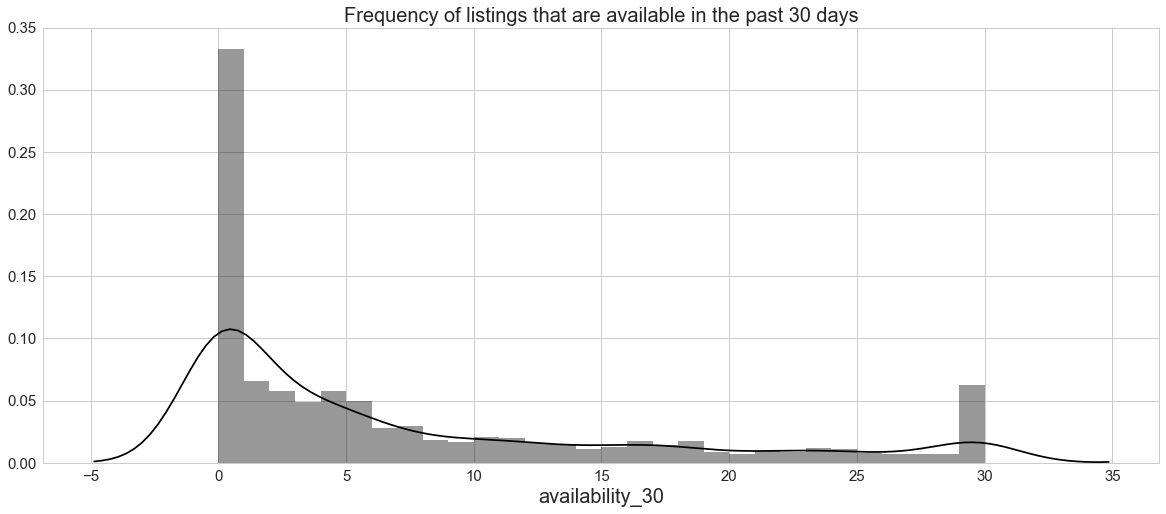

In [497]:
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.distplot(df["availability_30"], bins=30, color="black").set_title("Frequency of listings that are available in the past 30 days", fontsize = 20.0)
plt.show()

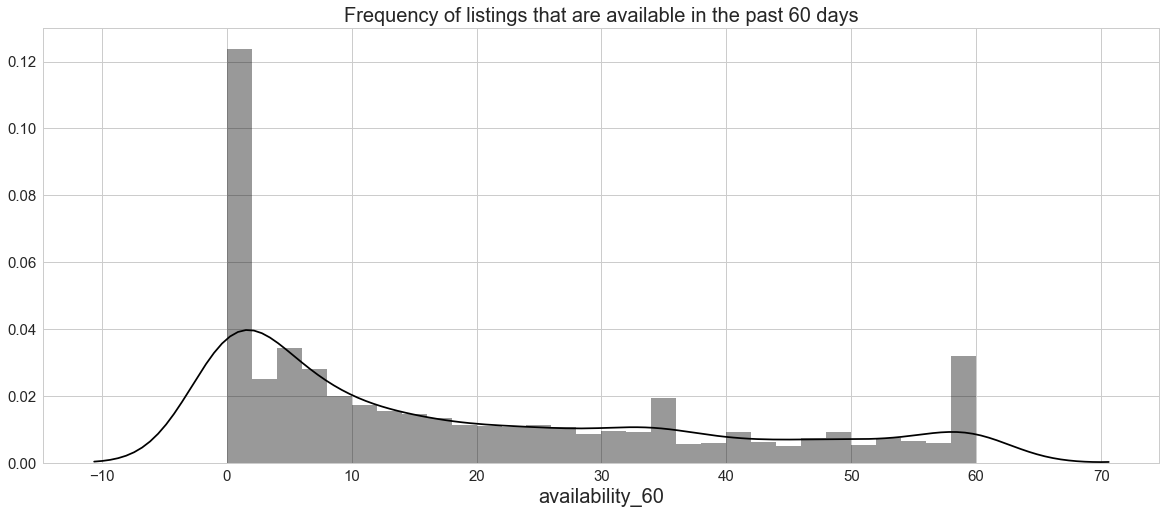

In [498]:
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.distplot(df["availability_60"], bins=30, color="black").set_title("Frequency of listings that are available in the past 60 days", fontsize = 20.0)
plt.show()

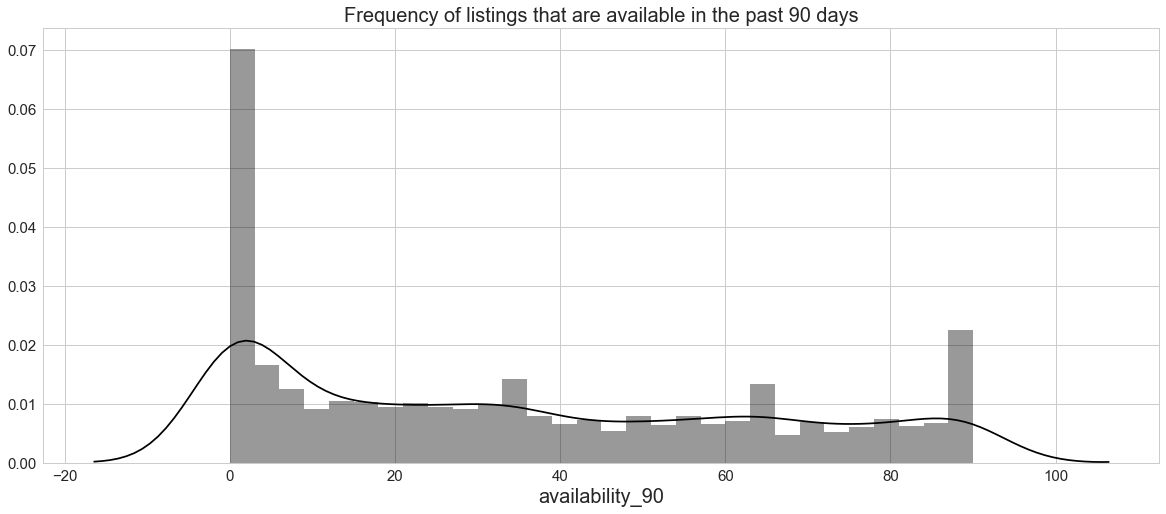

In [499]:
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.distplot(df["availability_90"], bins=30, color="black").set_title("Frequency of listings that are available in the past 90 days", fontsize = 20.0)
plt.show()

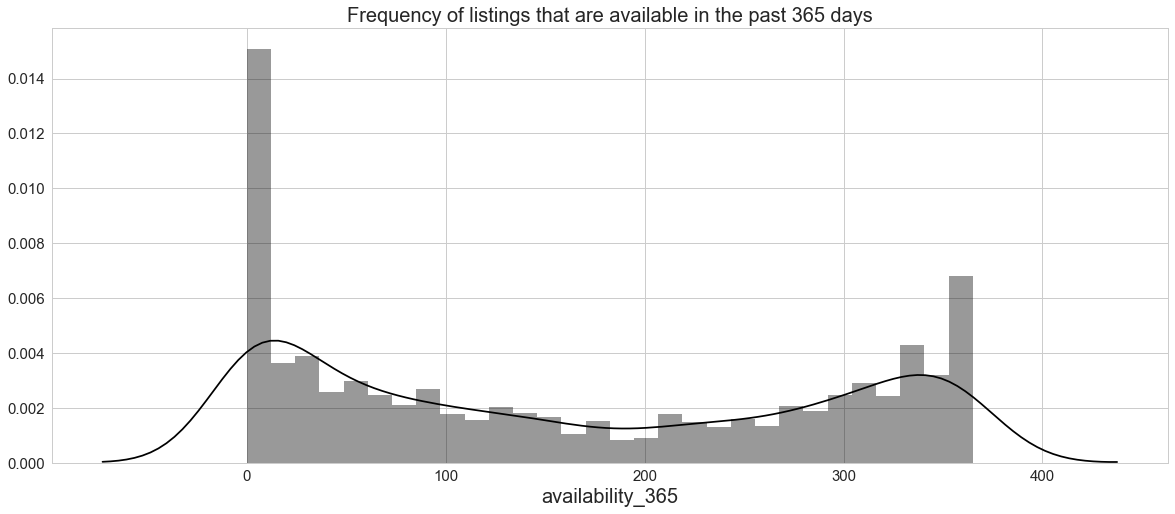

In [500]:
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.distplot(df["availability_365"], bins=30, color="black").set_title("Frequency of listings that are available in the past 365 days", fontsize = 20.0)
plt.show()

## The above plots show the distribution of the availabilities of the listings. More popular listings would have less availability. 

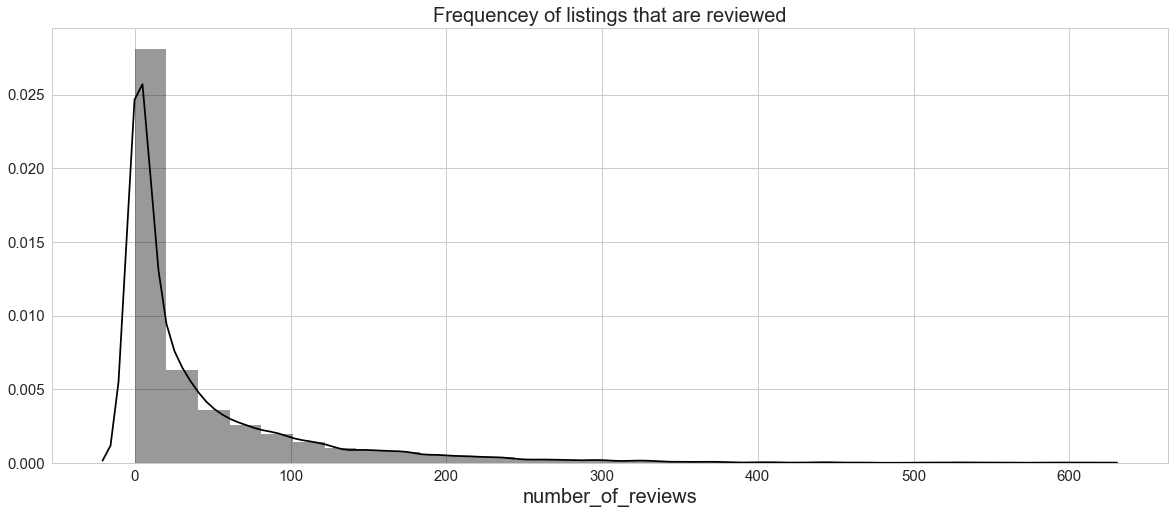

In [501]:
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.distplot(df["number_of_reviews"], bins=30, color='black').set_title("Frequencey of listings that are reviewed", fontsize = 20.0)
plt.show()

# What are the most popular neighborhoods?

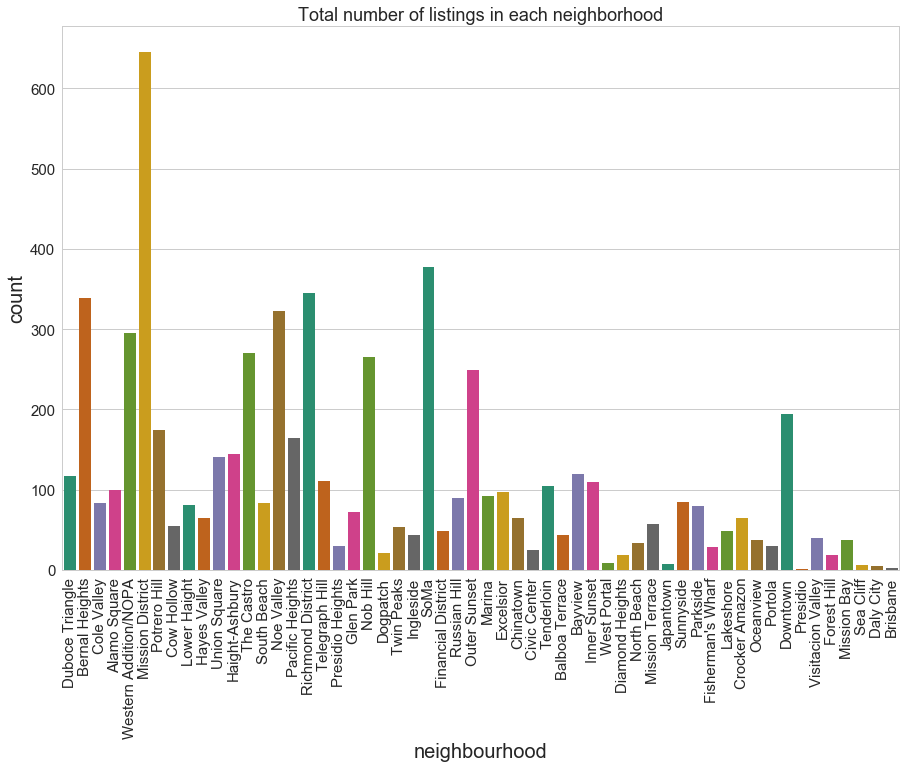

In [518]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='neighbourhood',data=df, palette="Dark2").set_title("Total number of listings in each neighborhood")
plt.show()

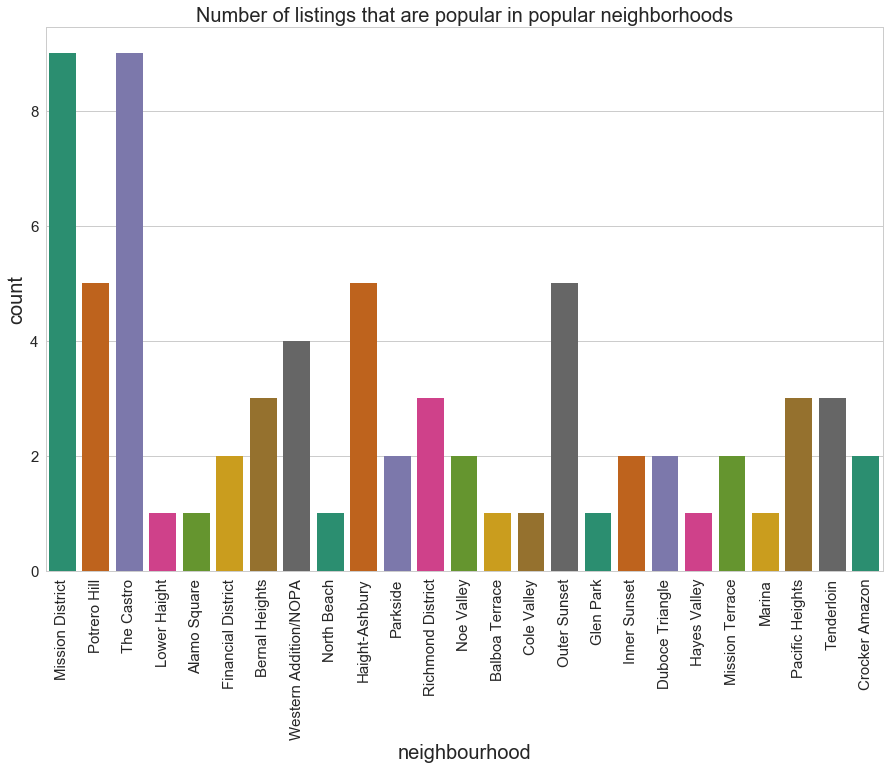

In [503]:
dff= df[df['number_of_reviews']>0.5*df.number_of_reviews.max()]
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='neighbourhood',data=dff, palette="Dark2").set_title("Number of listings that are popular in popular neighborhoods", fontsize = 20.0)
plt.show()


### Number of reviews along with the number of listings that reviewed

In [440]:
df.number_of_reviews.value_counts().nlargest(10)

0    1135
1     483
2     317
3     208
4     205
5     182
6     148
8     128
7     112
9     105
Name: number_of_reviews, dtype: int64

### Most popular neighbourhoods along with the number of listings in that neighbourhood.

In [441]:
df.neighbourhood.value_counts().nlargest(10)

Mission District         645
SoMa                     377
Richmond District        345
Bernal Heights           339
Noe Valley               323
Western Addition/NOPA    295
The Castro               270
Nob Hill                 265
Outer Sunset             249
Downtown                 194
Name: neighbourhood, dtype: int64

# What are the factors that make a neighborhood and a listing more popular?

### Most used prices, weekely prices, monthly prices, security deposits, and cleaning fees
#### -1 means the the host left it empty

In [443]:
pd.value_counts(df['price']).nlargest(10)

$150.00    240
$250.00    171
$100.00    162
$125.00    158
$200.00    156
$120.00    122
$300.00    119
$80.00     109
$90.00     107
$99.00     102
Name: price, dtype: int64

In [524]:
pd.value_counts(df['weekly_price']).nlargest(10)

-1           5404
$1,000.00      48
$1,500.00      46
$700.00        43
$1,200.00      42
$800.00        34
$900.00        34
$850.00        29
$750.00        28
$1,400.00      28
Name: weekly_price, dtype: int64

In [525]:
pd.value_counts(df['monthly_price']).nlargest(10)

-1           5391
$4,000.00      47
$3,500.00      45
$3,000.00      40
$2,500.00      39
$4,500.00      36
$5,000.00      35
$3,200.00      28
$6,000.00      24
$2,000.00      22
Name: monthly_price, dtype: int64

In [526]:
pd.value_counts(df['security_deposit']).nlargest(10)

-1           1388
$0.00        1315
$500.00      1171
$200.00       390
$100.00       361
$1,000.00     336
$300.00       331
$250.00       247
$150.00       148
$400.00       131
Name: security_deposit, dtype: int64

In [527]:
pd.value_counts(df['cleaning_fee']).nlargest(10)

-1         736
$100.00    681
$150.00    433
$50.00     419
$75.00     273
$25.00     249
$200.00    247
$0.00      211
$80.00     210
$95.00     209
Name: cleaning_fee, dtype: int64

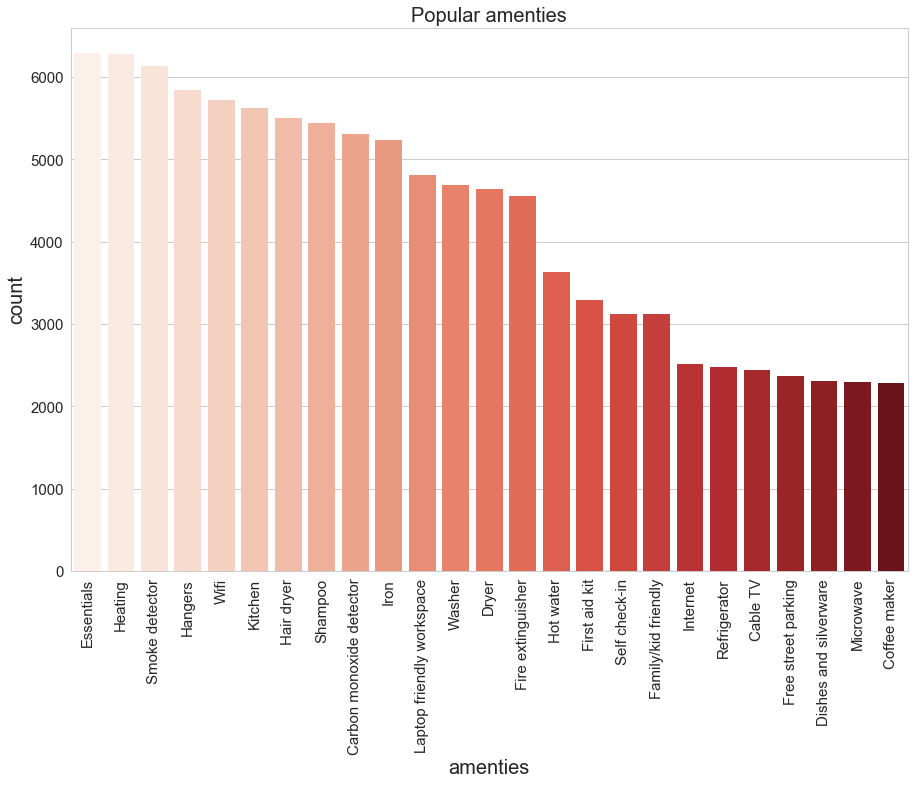

In [520]:
arr = ''
for i in df['amenities']:
    arr = arr + i[1:-1].replace('"','')
arr = arr.split(',')

from collections import Counter
c = Counter(arr)
data = c.most_common(25)
dff = pd.DataFrame(data, columns=['amenties', 'count'])
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
bar = sns.barplot(x='amenties',y = 'count', data=dff, palette="Reds").set_title("Popular amenties", fontsize = 20.0)
plt.show()


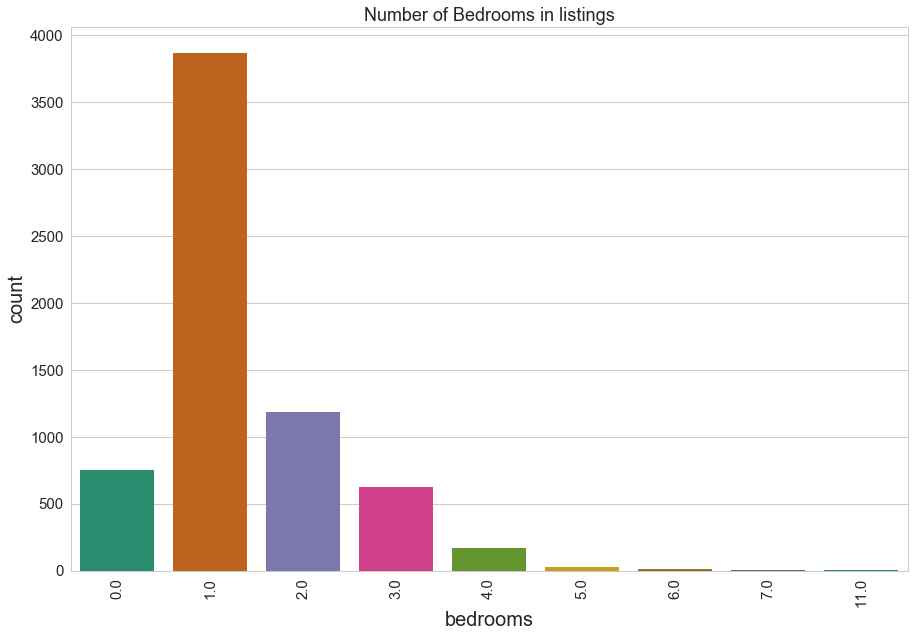

In [515]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='bedrooms',data=df, palette="Dark2").set_title("Number of Bedrooms in listings")
plt.show()

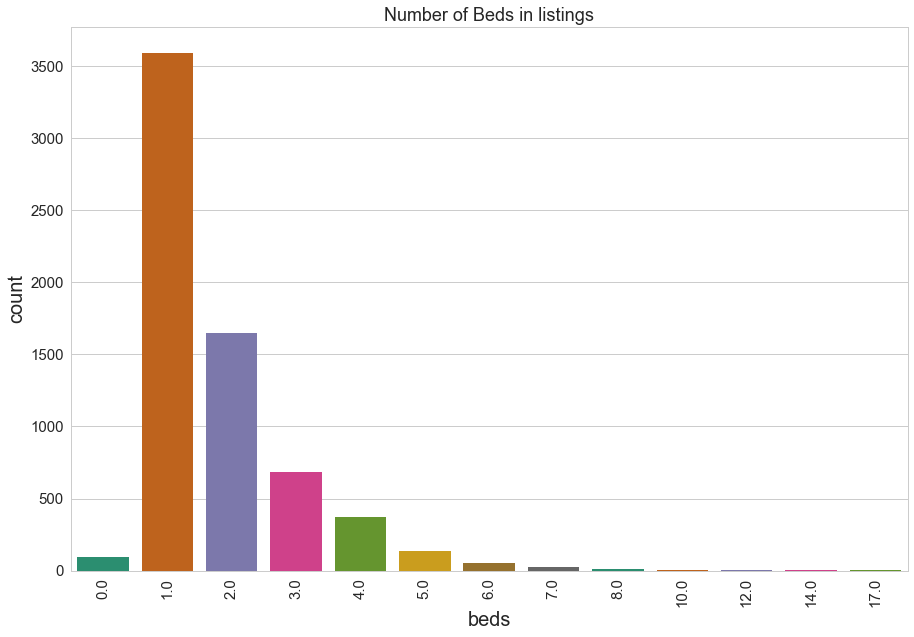

In [516]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='beds',data=df, palette="Dark2").set_title("Number of Beds in listings")
plt.show()

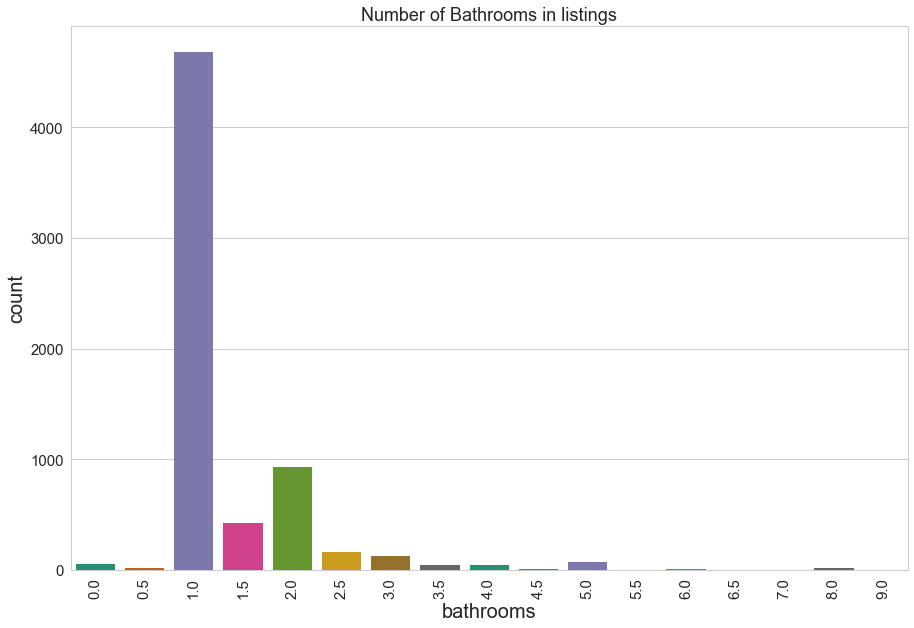

In [514]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='bathrooms',data=df, palette="Dark2").set_title("Number of Bathrooms in listings")
plt.show()

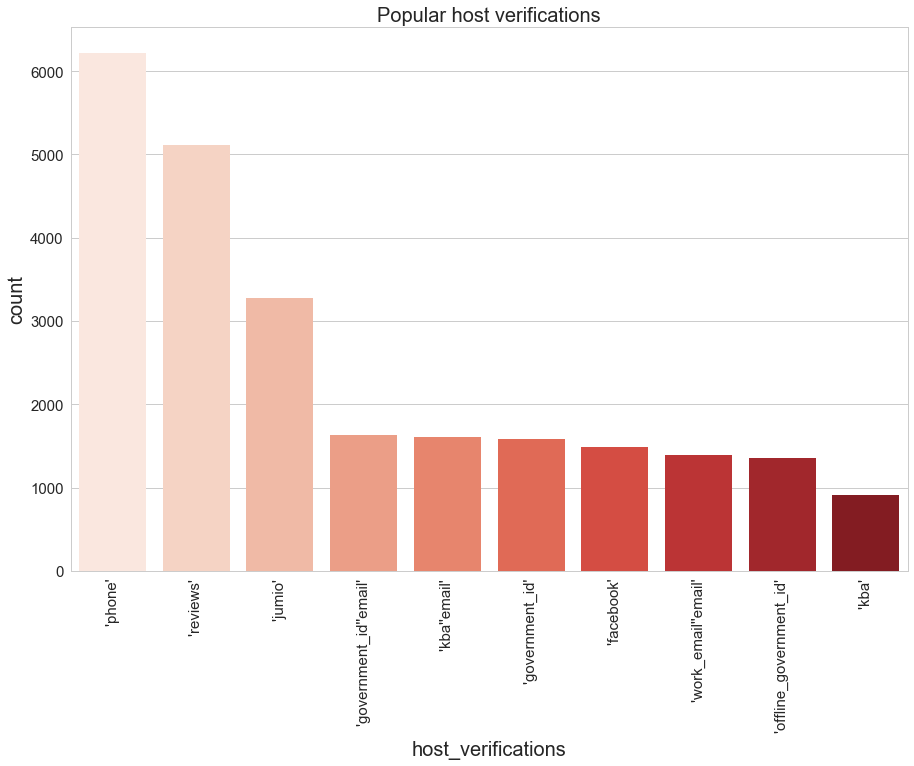

In [523]:
arr = ''
for i in df['host_verifications']:
    arr = arr + i[1:-1].replace('"','')
arr = arr.split(',')

from collections import Counter
c = Counter(arr)
data = c.most_common(10)
dff = pd.DataFrame(data, columns=['host_verifications', 'count'])
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
bar = sns.barplot(x='host_verifications',y = 'count', data=dff, palette="Reds").set_title("Popular host verifications", fontsize = 20.0)
plt.show()


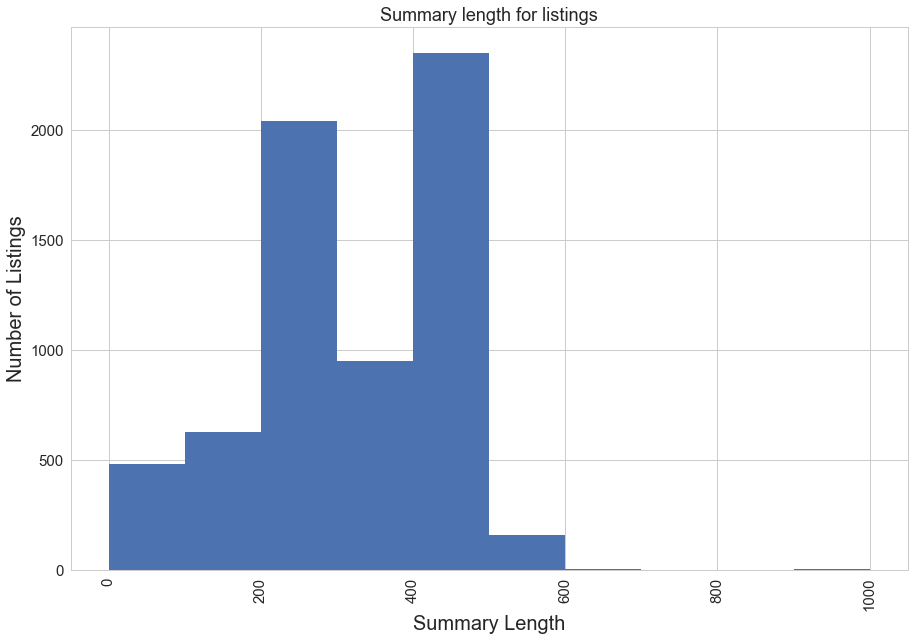

In [544]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
pl = df['summary_len'].hist()
pl.set_title("Summary length for listings")
pl.set_xlabel("Summary Length")
pl.set_ylabel("Number of Listings")
plt.show()

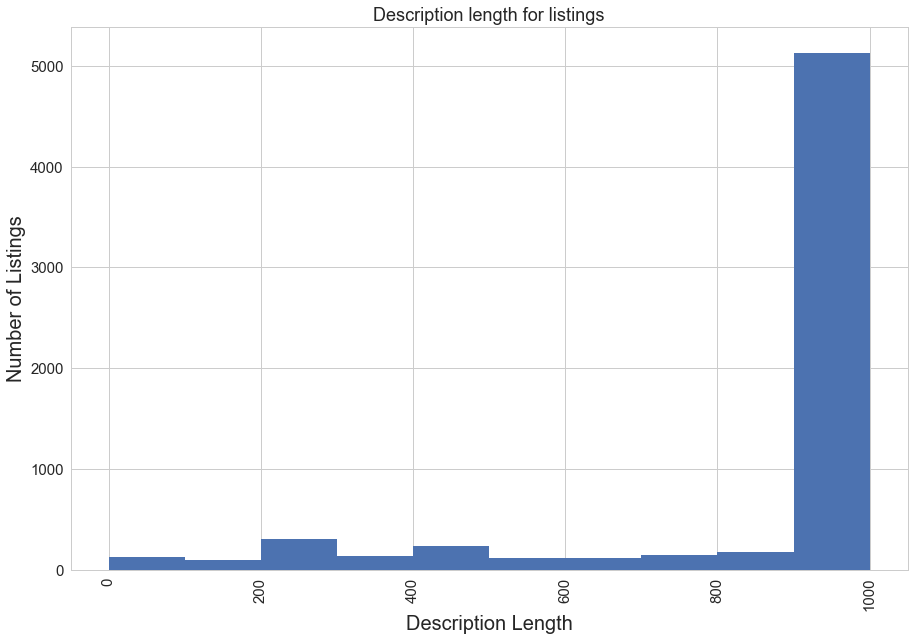

In [545]:

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
pl = df['description_len'].hist()
pl.set_title("Description length for listings")
pl.set_xlabel("Description Length")
pl.set_ylabel("Number of Listings")
plt.show()

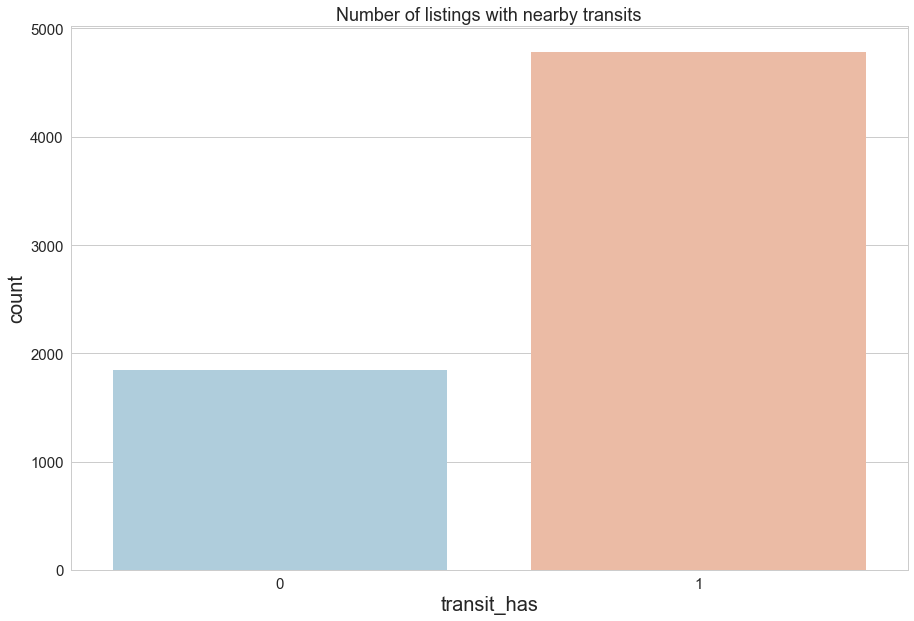

In [554]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='transit_has',data=df,palette='RdBu_r').set_title("Number of listings with nearby transits")
plt.show()

In [576]:
import re
print("Number of No Smoking listings: ")
print(len([m.start() for m in re.finditer('no smok', arr)]))

print("Number of No Pets listings: ")
print(len([m.start() for m in re.finditer('no pet', arr)]))



Number of No Smoking listings: 
479
Number of No Pets listings: 
226
